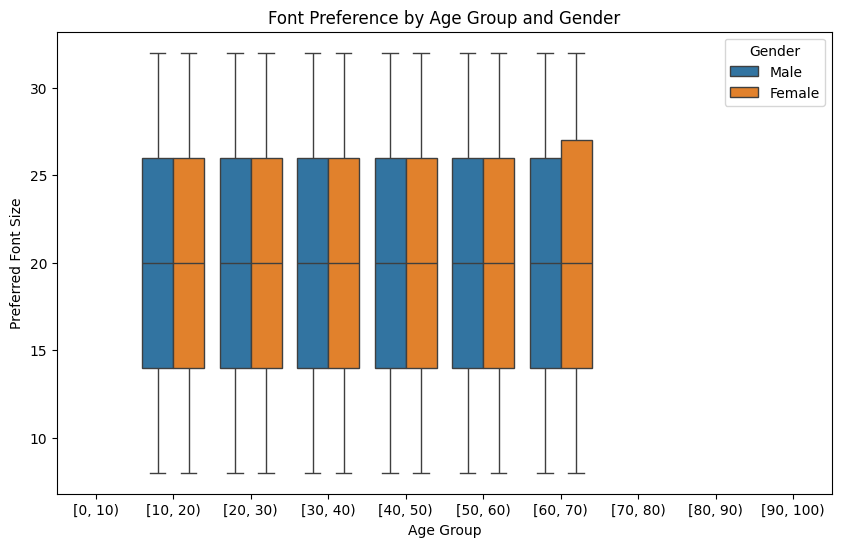

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


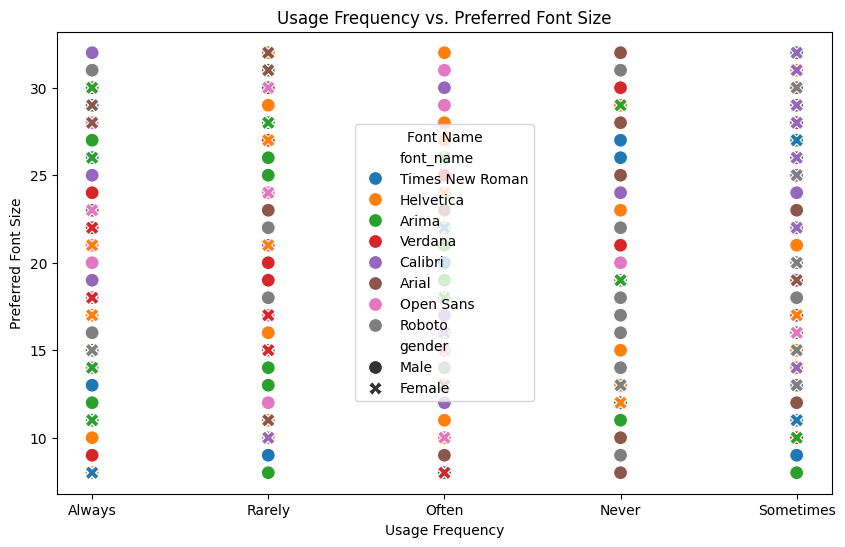

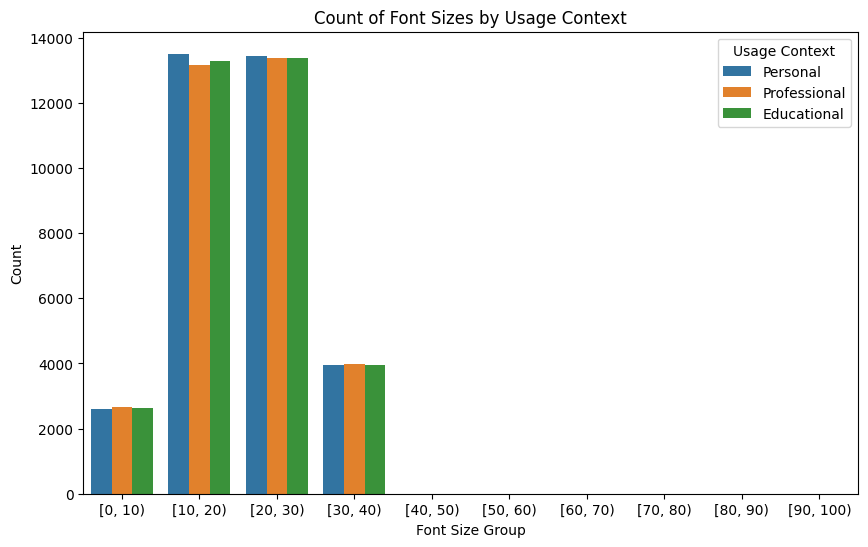

<ipython-input-1-69b137a7be4e>:59: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_usage_pivot = df.pivot_table(index='age_group', columns='font_size_group', values='usage_frequency', aggfunc='mean')


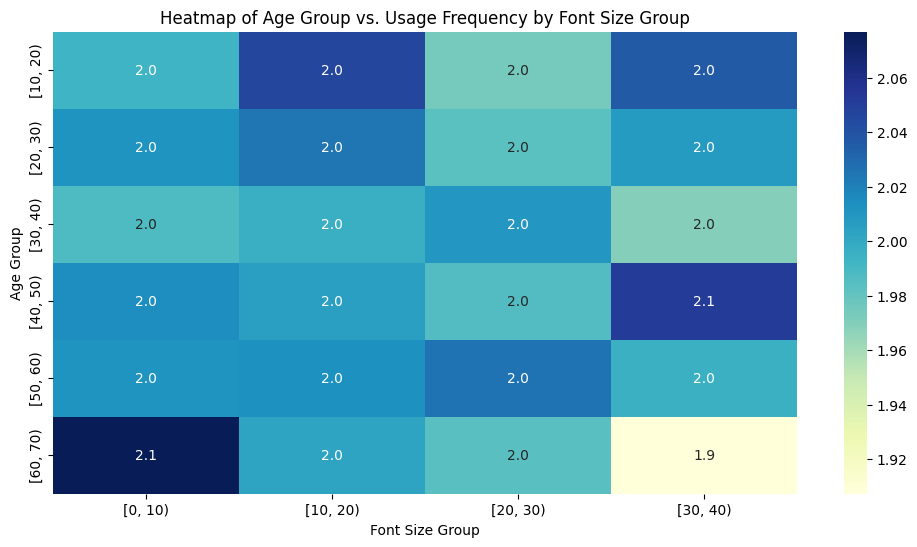

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/font_usage_data_100k.csv') # Replace with the path to your dataset

# Group font sizes into intervals of 10
df['font_size_group'] = pd.cut(df['preferred_font_size'], bins=range(0, 101, 10), right=False)

# Group ages into intervals of 10
df['age_group'] = pd.cut(df['age'], bins=range(0, 101, 10), right=False)

# Plot 1: Distribution of Font Preferences by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='preferred_font_size', hue='gender')
plt.title('Font Preference by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Preferred Font Size')
plt.legend(title='Gender')
plt.show()

# Plot 2: Usage Frequency vs. Preferred Font Size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='usage_frequency', y='preferred_font_size', hue='font_name', style='gender', s=100)
plt.title('Usage Frequency vs. Preferred Font Size')
plt.xlabel('Usage Frequency')
plt.ylabel('Preferred Font Size')
plt.legend(title='Font Name')
plt.show()

# Plot 3: Font Size Group Counts by Usage Context
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='font_size_group', hue='usage_context')
plt.title('Count of Font Sizes by Usage Context')
plt.xlabel('Font Size Group')
plt.ylabel('Count')
plt.legend(title='Usage Context')
plt.show()


# Define mapping for usage_frequency values if they are categorical
frequency_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    'Always': 4
}

# Apply the mapping to convert `usage_frequency` to numeric values
df['usage_frequency'] = df['usage_frequency'].map(frequency_mapping)

# Drop rows with NaN values in `usage_frequency` if any were unmapped
df = df.dropna(subset=['usage_frequency'])


# Plot 4: Age Group vs. Usage Frequency Heatmap
age_usage_pivot = df.pivot_table(index='age_group', columns='font_size_group', values='usage_frequency', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(age_usage_pivot, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Heatmap of Age Group vs. Usage Frequency by Font Size Group')
plt.xlabel('Font Size Group')
plt.ylabel('Age Group')
plt.show()



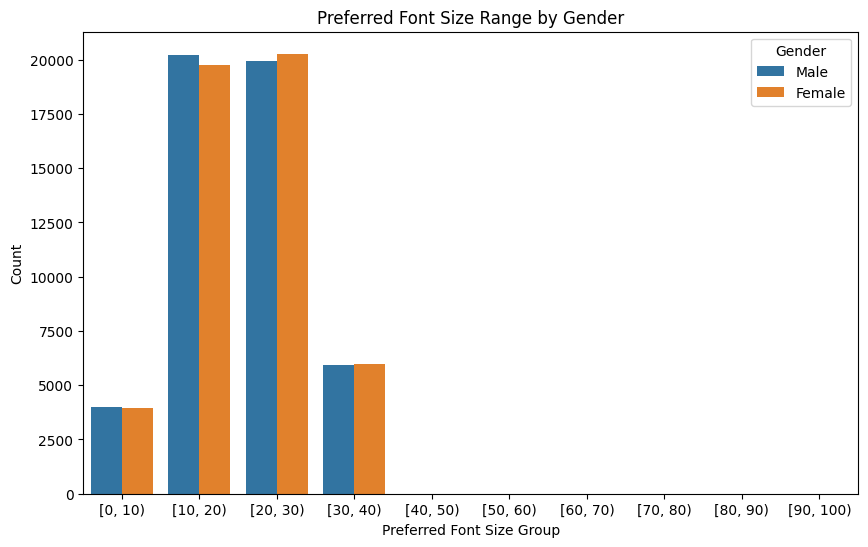

In [ ]:
# Group font sizes into intervals of 10
df['font_size_group'] = pd.cut(df['preferred_font_size'], bins=range(0, 101, 10), right=False)

# Plot: Preferred Font Size Range vs Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='font_size_group', hue='gender')
plt.title('Preferred Font Size Range by Gender')
plt.xlabel('Preferred Font Size Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

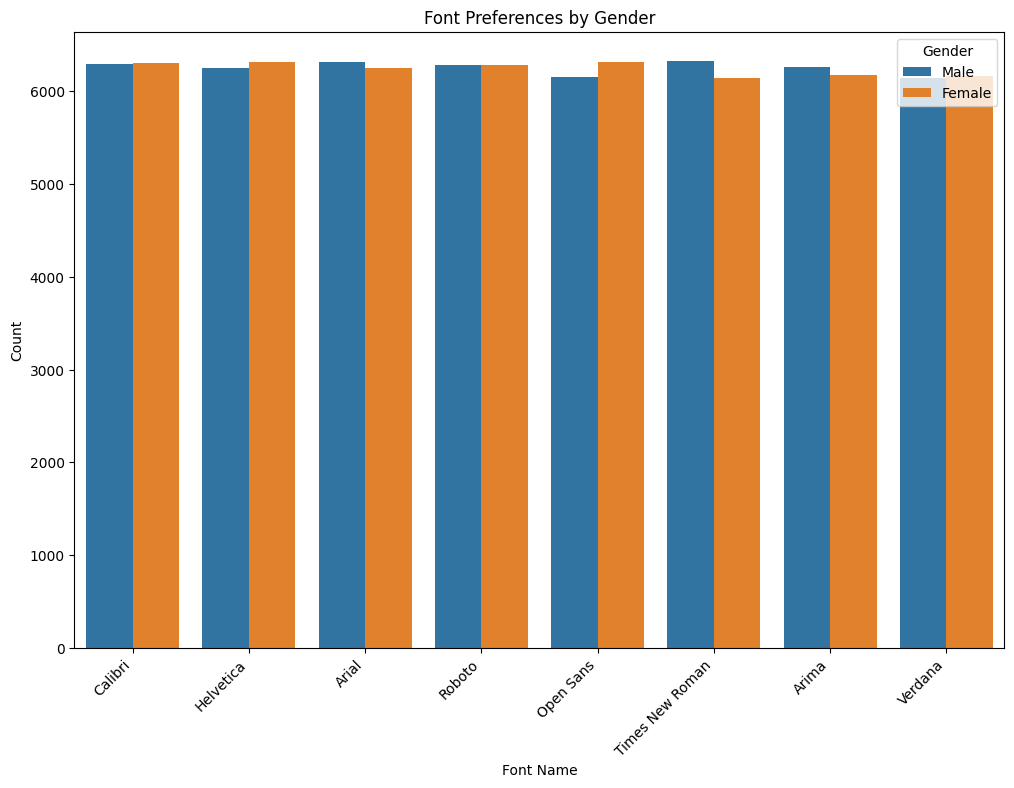

In [ ]:
# Plot: Font Preference by Gender
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='font_name', hue='gender', order=df['font_name'].value_counts().index)
plt.title('Font Preferences by Gender')
plt.xlabel('Font Name')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')  # Rotate font names for better readability
plt.show()

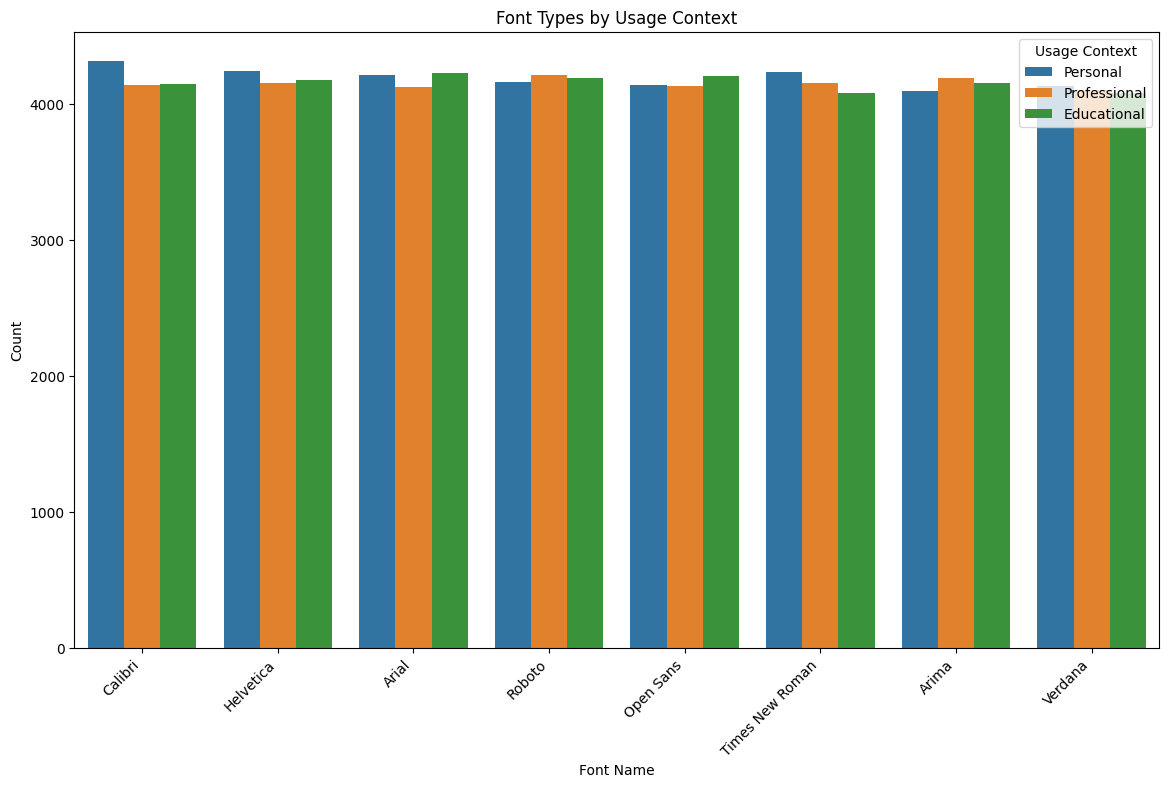

In [ ]:
# Plot: Font Types by Usage Context
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='font_name', hue='usage_context', order=df['font_name'].value_counts().index)
plt.title('Font Types by Usage Context')
plt.xlabel('Font Name')
plt.ylabel('Count')
plt.legend(title='Usage Context')
plt.xticks(rotation=45, ha='right')  # Rotate font names for better readability
plt.show()

In [ ]:
# Define mapping for usage_frequency values if they are categorical
frequency_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    'Always': 4
}

# Apply the mapping to convert `usage_frequency` to numeric values
df['usage_frequency'] = df['usage_frequency'].map(frequency_mapping)

# Drop rows with NaN values in `usage_frequency` if any were unmapped
df = df.dropna(subset=['usage_frequency'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv('/content/font_usage_data_100k.csv')  # Replace with the path to your dataset

# Group font sizes into intervals of 10 and replace with midpoints
df['font_size_group'] = pd.cut(df['preferred_font_size'], bins=range(0, 101, 10), right=False)
df['font_size_group'] = df['font_size_group'].apply(lambda x: x.mid if pd.notnull(x) else x)

# Group ages into intervals of 10 and replace with midpoints
df['age_group'] = pd.cut(df['age'], bins=range(0, 101, 10), right=False)
df['age_group'] = df['age_group'].apply(lambda x: x.mid if pd.notnull(x) else x)

# Define mapping for usage_frequency values if they are categorical
frequency_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    'Always': 4
}

# Apply the mapping to convert `usage_frequency` to numeric values
df['usage_frequency'] = df['usage_frequency'].map(frequency_mapping)

# Drop rows with NaN values in `usage_frequency` or target column
df = df.dropna(subset=['usage_frequency', 'font_name'])

# Define features and target variable
X = df.drop(columns=['font_name', 'preferred_font_size', 'age'])  # Drop original columns replaced by groups
y = df['font_name']

# Ensure there are no empty datasets
if X.empty or y.empty:
    raise ValueError("The dataset is empty or has missing target values after preprocessing.")

# Identify categorical features
categorical_features = ['gender', 'usage_context']  # Adjust as needed

# Create a column transformer to encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Split data into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create individual models with pipelines
decision_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

logistic_regression = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

perceptron = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', Perceptron(max_iter=1000, tol=1e-3, random_state=42))
])

# Train individual models
decision_tree.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
perceptron.fit(X_train, y_train)

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('decision_tree', decision_tree),
        ('logistic_regression', logistic_regression),
        ('perceptron', perceptron)
    ],
    voting='hard'  # Use 'soft' for weighted probabilities if needed
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Ensemble Model Accuracy: 0.13
Classification Report:
                 precision    recall  f1-score   support

          Arial       0.13      0.21      0.16      2522
          Arima       0.12      0.14      0.13      2406
        Calibri       0.13      0.22      0.17      2564
      Helvetica       0.11      0.16      0.13      2458
      Open Sans       0.13      0.07      0.09      2508
         Roboto       0.13      0.05      0.07      2542
Times New Roman       0.15      0.03      0.04      2513
        Verdana       0.12      0.13      0.12      2487

       accuracy                           0.13     20000
      macro avg       0.13      0.13      0.11     20000
   weighted avg       0.13      0.13      0.11     20000

